# Ejercicio 6.10

Considere la ecuación 
\begin{equation}
x=1-e^{-cx}
\end{equation}
donde c es un parámetro conocido y x desconocido (modelo matemático de las epidemias)


a) Escriba un programa para resolver esta ecuación para x, usando el método de relajación 
para el caso c=2 con una precisión de 10e-6

b) Modifique su programa  para calcular la solución para valores de c de 0 a 3 en passo de 0.01 y haga un gráfico de x en función de c.

debería ver una transición clara de un régimen en el que x=0 en un régimen distinto de cero.

# a)

In [1]:
from numpy import *
from math import sin, cos, pi, exp, log
from pylab import plot, xlabel, ylabel, show

In [10]:
c = 2
pre = 1e-6
mi = 1.0
err = 1.0
i = 0

while err > pre:
    mi,mf = 1-exp(-c*mi),mi 
    err=abs((mi-mf)/(1-exp(c*mf)/c))  
    i = i + 1
    
print("La solución es:",mi)

La solución es: 0.7968126311118457
El número de iteraciones es: 14


# b)

In [11]:
c = 3.0
m = []
pre1 = 1e-6

ptos = 300
spc = linspace(0.01,c,ptos)

for c in spc:
    mi = 1.0
    err = 1.0
    
    while err > pre:
        mi,mf = 1-exp(-c*mi),mi 
        err=abs((mi-mf)/(1-exp(c*mf)/c)) 
    m.append(mi)   

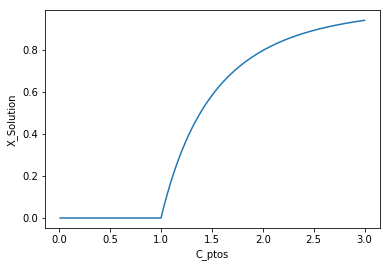

In [12]:
plot(spc,m)
xlabel("C_ptos")
ylabel("X_Solution")
show()

# Ejercicio 6.11

# a)

 Derive un equivalente de la ecuación. (6.81) para el método de sobre relajación y, por lo tanto, muestra que el error en x ', el equivalente de la ecuación. (6.83), viene dado por:

\begin{equation}
\varepsilon'=\frac{x-x'}{1-1/\left [ (1+w)f'(x)-w \right ]}
\end{equation}

Partiendo de la definicion de $x^{*}$

\begin{equation}
x^{*}=x'+\varepsilon'  \\
\end{equation}

Ahora, conociendo el valor de $x{}'$ para el metodo de sobrerelajacion

\begin{equation}
x'=(1+\omega)f(x)-\omega x
\end{equation}

Reemplazando $x{}'$ en $x^{*}$, obtenemos

\begin{equation}
x^{*}=(1+\omega)f(x)-\omega x+\varepsilon'\\
f'(x^{*})=(1+\omega)f'(x)-\omega
\end{equation}

Reescribiendo para obtner un estimado de $\varepsilon' $ Ec.6.83

\begin{equation}
\varepsilon' =\frac{x-x^{*}}{1-\frac{1}{f'(x^{*})}}
\end{equation}

Reemplazando los valores encontrados obtenemos
\begin{equation}
\varepsilon'=\frac{x-x^{*}}{1-\frac{1}{(1+\omega)f'(x)-\omega}}
\end{equation}

# b) 

Considere nuevamente la ecuación $x = 1-e^{-cx}$ que resolvimos en el ejercicio 6.10. Tome el programa que escribió para la parte (a) de ese ejercicio, que resolvió la ecuación para el caso c = 2, y modifíquelo para imprimir el número de iteraciones necesarias para converger en una solución precisa de $10^{-6}$.

In [25]:
###### Constantes ######
c = 2
########################

###### Valores Iniciales ######
pre = 1e-6
mi = 1.0
err = 1.0
i = 0
###############################


while err > pre:
    mi,mf = 1-exp(-c*mi),mi 
    err=abs((mi-mf)/(1-exp(c*mf)/c))  
    i = i + 1
    
print("La solución es:",mi)
print("El número de iteraciones es:",i)

#El while anterior calcular la solución de la funcion, para la precisión que registrada anteriormente. 
#teniendo como resultado el número de iteraciones y además una única solución del problema que se muestra
#a continuación.

La solución es: 0.7968126311118457
El número de iteraciones es: 14


# c) 

Ahora escriba un nuevo programa (o modifique el anterior) para resolver la misma ecuación $x=1-e^{-cx}$ para c = 2, nuevamente con una precisión de $10^{-6}$, pero esta vez usando sobrerelajamiento. Haga que su programa imprima las respuestas que encuentre junto con la cantidad de iteraciones que tomó para encontrarlas. Experimente con diferentes valores de ω para ver qué tan rápido puede lograr que el método converja. Un valor de ω = 0.5 es un punto de partida razonable. Con un poco de prueba y error, debería poder hacer que el cálculo converja aproximadamente el doble de rápido que el método de relajación simple, es decir, en aproximadamente la mitad de las iteraciones.

In [35]:
###### Constantes ######
c = 2.0
w = 0.5
########################

###### Valores Iniciales ######
mi = 1.0
m2 = []
pre2 = 1e-6
j = 0
err = 1.0
###############################


while err > pre:
    mi,mf = (1+w)*(1-exp(-c*mi))-w*mi,mi 
    err=abs((mi-mf)/(1-(1/((c*exp(-c*mf))+(w*c*exp(-c*mf))-w)))) 
    m2.append(mi)
    j=j+1

print("El número de iteraciones es:",j)
print("Las soluciones son:",m2)

#El while anterior calcular las soluciones de la funcion, para la precisión que registrada anteriormente. 
#teniendo como resultado el número de iteraciones y además las soluciones en cada iteración que son guardadas 
#en un arreglo y que serán mostradas enseguida.

El número de iteraciones es: 4
Las soluciones son: [0.796997075145081, 0.7968323724281932, 0.7968143476015649, 0.7968123729832619]


# d) 

¿Hay alguna circunstancia bajo la cual usar un valor ω < 0 nos ayudaría a encontrar una solución más rápido de lo que podemos con el método de relajación ordinario? (Sugerencia: la respuesta es sí, pero ¿por qué?)

Se puede obtener una solución más rápida con valores negativos pero esto depende del valor de la solución, es decir, si la solución tiene un valor negativo, por tanto al tener un w < 0 esta tendra menos iteraciones para encontrar la solución.